<a href="https://colab.research.google.com/github/aritro66/CarPricePrediction/blob/main/CarPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

Collecting and Processing Data

In [26]:
# Loading the dataset using Pandas function
car_data = pd.read_csv('/content/car data.csv')

In [27]:
# Checking data of first 5 rows
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [28]:
# Checking data of last 5 rows
car_data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [29]:
# No. of rows and columns
car_data.shape

(301, 9)

In [30]:
# Getting basic information about data
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [31]:
# Finding missing values
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [32]:
# number of values for each fuel_type, seller_type, transmission
print(car_data["Fuel_Type"].value_counts())
print(car_data["Seller_Type"].value_counts())
print(car_data["Transmission"].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


Encoding the Categorical Data

In [33]:
# encoding Fuel_Type, Seller_Type, Transmission Columns
car_data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)
car_data.replace({'Seller_Type':{'Dealer':0 ,'Individual':1}}, inplace=True)
car_data.replace({'Transmission':{'Manual':0 ,'Automatic':1}}, inplace=True)

In [34]:
# number of values for each fuel_type, seller_type, transmission
print(car_data["Fuel_Type"].value_counts())
print(car_data["Seller_Type"].value_counts())
print(car_data["Transmission"].value_counts())

0    239
1     60
2      2
Name: Fuel_Type, dtype: int64
0    195
1    106
Name: Seller_Type, dtype: int64
0    261
1     40
Name: Transmission, dtype: int64


Understanding the correlation between various features in the dataset

1.Positive Correlation

2.Negative Correlation

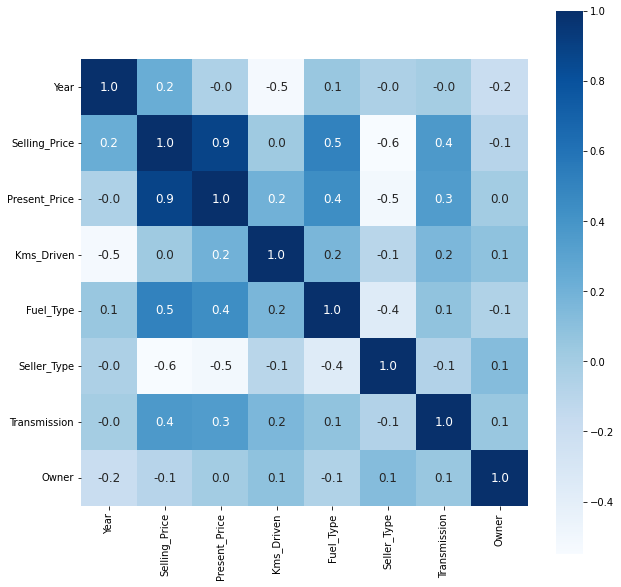

In [35]:
# constructing a heatmap to understand correlation
correlation = car_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':12}, cmap='Blues')

In [36]:
# Separating data and labels
X = car_data.drop(columns=['Car_Name','Selling_Price'],axis=1)
Y = car_data['Selling_Price']
print(X.shape)
print(Y.shape)

(301, 7)
(301,)


Training and Testing data

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

Modal Training using Lasso Regressor

In [38]:
model = Lasso()
model.fit(X_train,y_train)

Lasso()

Modal Evalution

In [41]:
# r2 score of Training Data
train_prediction = model.predict(X_train)
print('r2 Score ',r2_score(y_train,train_prediction))

r2 Score  0.843587395258283


In [42]:
# r2 score of Testing Data
test_prediction = model.predict(X_test)
print('r2 Score ',r2_score(y_test,test_prediction))

r2 Score  0.8497457570738539


Visualizing the actual prices and predicted prices

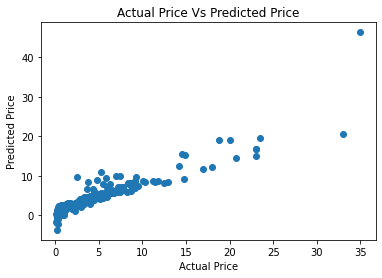

In [43]:
plt.scatter(y_train, train_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price Vs Predicted Price')
plt.show()